In [1]:
import torch
import torchvision
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

sys.path.append("..")

In [2]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 1.13.1+cu117
Torchvision version: 0.14.1+cu117
CUDA is available: True


## Installation and Downloads

In [ ]:
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
!wget -P images https://raw.githubuserconent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

### Download one of the 3 checkpoints available
  
##### Default or vit_h (2.57 GB): sam_vit_h_4b8939.pth
##### vit_l (1.26 GB): sam_vit_l_0b3195.pth
##### vit_b (375 MB): sam_vit_b_01ec64.pth 

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    
def reshape(image, size=512, if_base64=False):
    # Ratio for showing up in Markdown
    if image.shape[0] < size and image.shape[1] < size: 
        ratio = 1
    else: 
        ratio = size / max(image.shape[0], image.shape[1])
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    image = cv2.resize(image, (width, height))

    if if_base64:
        return base64.b64encode(cv2.imencode('.png', image)[1]).decode()
    return image

In [5]:
image = cv2.imread('/home/jupyter/ml-ops-segment-anything/demo-notebooks/images/club-house.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = reshape(image)

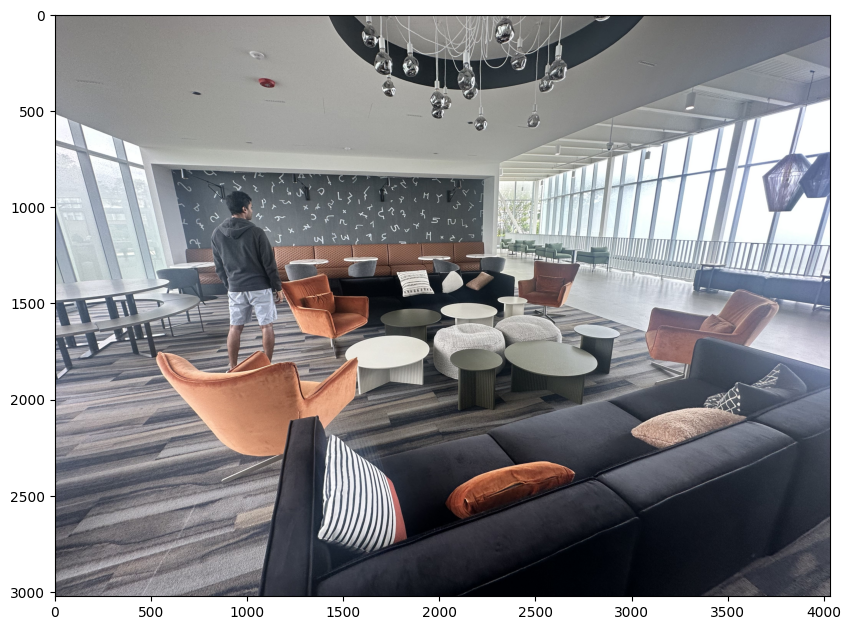

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [7]:
sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

OutOfMemoryError: CUDA out of memory. Tried to allocate 768.00 MiB (GPU 0; 14.56 GiB total capacity; 1.95 GiB already allocated; 723.50 MiB free; 2.04 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF